## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID" )

In [3]:
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
combined_data['Mouse ID'].value_counts()
#combined_data['Mouse ID'].values


g989    13
d251    10
m601    10
c832    10
l725    10
        ..
l872     1
h428     1
x226     1
u153     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
combined_data['Mouse ID'].count

<bound method Series.count of 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object>

In [6]:
# Checking the number of mice.
#number_mice = combined_data["Mouse ID"].count
number_mice = len(combined_data["Mouse ID"])
print(number_mice)


1893


In [7]:
mouse_ids = combined_data["Mouse ID"].unique()
mouse_count = len(mouse_ids)
mouse_count

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_id = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_data[combined_data.duplicated(keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
#combined_data_table = combined_data.loc[combined_data["Mouse ID"] == duplicate_id]=
#combined_data_table

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = combined_data.drop_duplicates(["Mouse ID", "Timepoint"],keep = "first")
clean_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean= len(clean_mice_data)
number_mice_clean



1888

In [13]:
count_clean_mice_array = clean_mice_data["Mouse ID"].unique()
count_clean_mice = len(count_clean_mice_array)
count_clean_mice

249

## Summary Statistics

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
Assemble the resulting series into a single summary dataframe.

In [14]:
# group data by drug regimen
mouse_group = clean_mice_data.groupby(["Drug Regimen"])
mouse_group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [15]:
# construct empty dataframe with drug regimen as index
grouped_mice = pd.DataFrame(index=clean_mice_data["Drug Regimen"].unique())
grouped_mice.head()

""
Ramicane
Capomulin
Infubinol
Placebo
Ceftamin


In [21]:
# fill dataframe with columns above from grouped clean_mice dataframe using simple operations
grouped_mice["Mean Tumor Volume"] = mouse_group["Tumor Volume (mm3)"].mean()
grouped_mice["Median Tumor Volume"] = mouse_group["Tumor Volume (mm3)"].median()
grouped_mice["Variance Tumor Volume"] = mouse_group["Tumor Volume (mm3)"].var()
grouped_mice["Standard Deviation Tumor Volume"] = mouse_group["Tumor Volume (mm3)"].std()
grouped_mice["SEM Tumor Volume"] = mouse_group["Tumor Volume (mm3)"].apply(st.sem)

grouped_mice.head()

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mouse_group["Tumor Volume (mm3)"].agg(["mean","median","var","std",st.sem])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

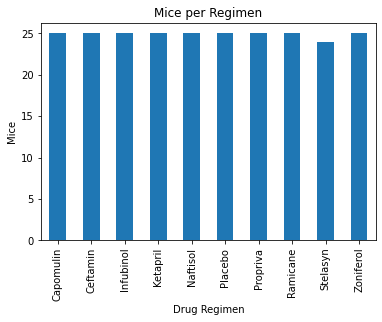

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mouse_group["Mouse ID"].nunique().plot.bar()
plt.ylabel("Mice")
plt.title("Mice per Regimen")
plt.show()

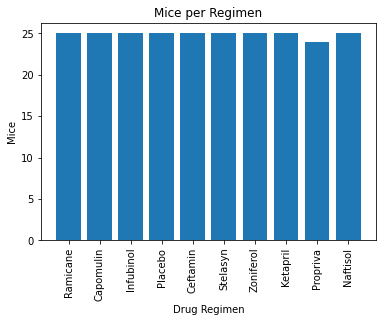

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(clean_mice_data["Drug Regimen"].unique(),mouse_group["Mouse ID"].nunique())
plt.xticks(rotation = 90)
plt.ylabel("Mice")
plt.xlabel("Drug Regimen")
plt.title("Mice per Regimen")
plt.show()

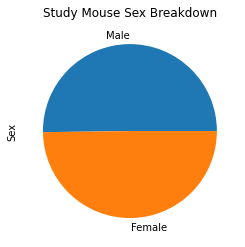

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_metadata["Sex"].value_counts().plot.pie()
plt.title("Study Mouse Sex Breakdown")
plt.show()

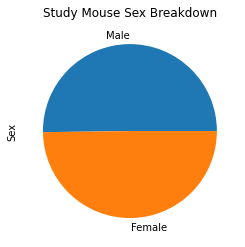

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_metadata["Sex"].value_counts(),labels = mouse_metadata["Sex"].unique())
plt.title("Study Mouse Sex Breakdown")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
ftv_grouped = clean_mice_data.loc[clean_mice_data["Drug Regimen"].isin({"Capomulin", "Ramicane", "Infubinol", "Ceftamin"})]
ftv_grouped.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# Start by getting the last (greatest) timepoint for each mouse
ftv_group_sort = ftv_grouped.sort_values(by=["Mouse ID","Timepoint"])
ftv_group_sort

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [35]:
ftv_group_sort_last = ftv_group_sort.drop_duplicates(["Mouse ID"] ,keep = "last")
ftv_group_sort_last

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ftv_group_sort_last["Drug Regimen"].unique()
drug_regimens


array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [40]:
# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    rows = ftv_group_sort_last.loc[ftv_group_sort_last["Drug Regimen"] == drug]
    volumes = rows["Tumor Volume (mm3)"]
    
    # add subset 
    vol_data.append(volumes)
    
    # Determine outliers using upper and lower bounds
    Q1 = volumes.quantile(0.25)
    Q3 = volumes.quantile(0.75)
    minimum = Q1 - 1.5*(Q3 - Q1)
    maximum = Q3 + 1.5*(Q3 - Q1)
    
    outliers = volumes.loc[(volumes < minimum) | (volumes > maximum)]
    print(outliers)


669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)


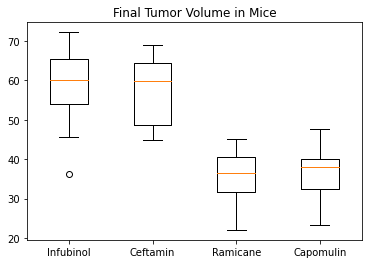

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(vol_data, labels=drug_regimens)
plt.title("Final Tumor Volume in Mice")
plt.show()

## Line and Scatter Plots

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_mice_data.loc[clean_mice_data["Drug Regimen"]=="Capomulin"]
capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [44]:
capomulin_one_mouse = capomulin.loc[capomulin["Mouse ID"] == capomulin["Mouse ID"].iloc[0]]
capomulin_one_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


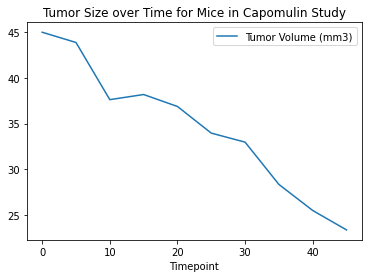

In [45]:
capomulin_one_mouse.plot("Timepoint","Tumor Volume (mm3)")
plt.title("Tumor Size over Time for Mice in Capomulin Study")
plt.show()

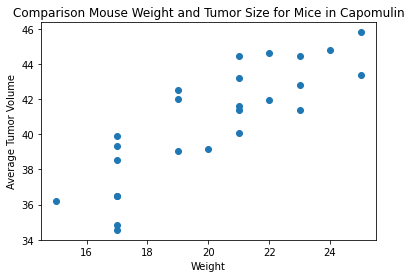

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_grouped = capomulin.groupby(["Mouse ID"])
average_vol = capomulin_grouped["Tumor Volume (mm3)"].mean()
weight = capomulin_grouped["Weight (g)"].first()

plt.scatter(weight, average_vol)
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Comparison Mouse Weight and Tumor Size for Mice in Capomulin")
plt.show()

## Correlation and Regression

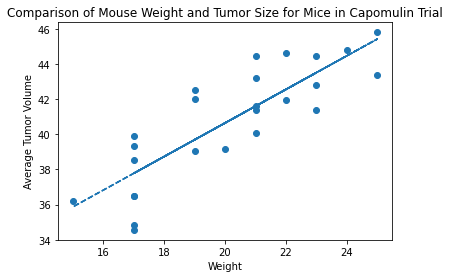

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r, p, std_err = st.linregress(weight,average_vol)
fit = slope * weight + intercept

plt.scatter(weight, average_vol)
plt.plot(weight,fit,"--")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Comparison of Mouse Weight and Tumor Size for Mice in Capomulin Trial")
plt.show()